In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

11560


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print(postanalysis_folder)
dark_mode = True
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0903_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)

comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')

if not os.path.exists(comp_figure_folder):
    print(f"Create: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use: {comp_figure_folder}")
median_figure_folder = os.path.join(figure_folder, 'Median_distmap')

if not os.path.exists(median_figure_folder):
    print(f"Create: {median_figure_folder}")
    os.makedirs(median_figure_folder)
else:
    print(f"Use: {median_figure_folder}")

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\AB_compartment
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\Median_distmap


In [4]:
# load median matrix
ensemble_median_filename = os.path.join(postanalysis_folder, 'ensemble_medianDict.pkl')
print(ensemble_median_filename)
ensemble_medianDict = np.load(ensemble_median_filename, allow_pickle=True)

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\ensemble_medianDict.pkl


## load codebook

In [5]:
import pandas as pd
from ImageAnalysis3.structure_tools import distance
# load codebook
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')
# partition by chr
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)

In [6]:
ensemble_median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
    ensemble_medianDict, codebook, use_cis=True, use_trans=False, sort_by_region=False)

<IPython.core.display.Javascript object>


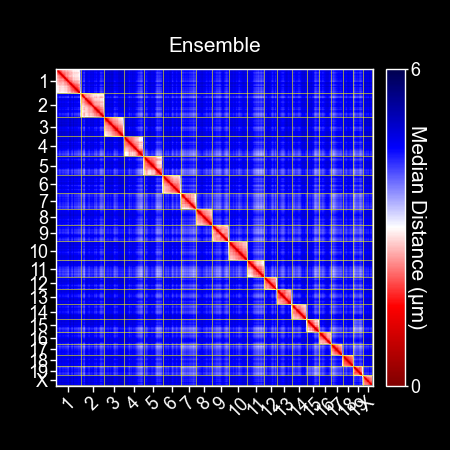

In [7]:
#%matplotlib notebook
#plt.style.use('default')

from matplotlib import cm
#from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

# create a color map
median_cmap = cm.get_cmap('seismic_r').copy()
median_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = 0,6

_pf = ax1.imshow(ensemble_median_mat, 
                 cmap=median_cmap, vmin=vmin, vmax=vmax, )
ax1.set_title("Ensemble", fontsize=_font_size)
ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.hlines(_chr_edges-0.5, 0, len(ensemble_median_mat), color='yellow', linewidth=0.2)
ax1.vlines(_chr_edges-0.5, 0, len(ensemble_median_mat), color='yellow', linewidth=0.2)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([0, len(ensemble_median_mat)])
ax1.set_ylim([len(ensemble_median_mat), 0])

ax1.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median Distance (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()

plt.savefig(os.path.join(median_figure_folder, f"trans_ensemble_median.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"trans_ensemble_median.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()


<IPython.core.display.Javascript object>


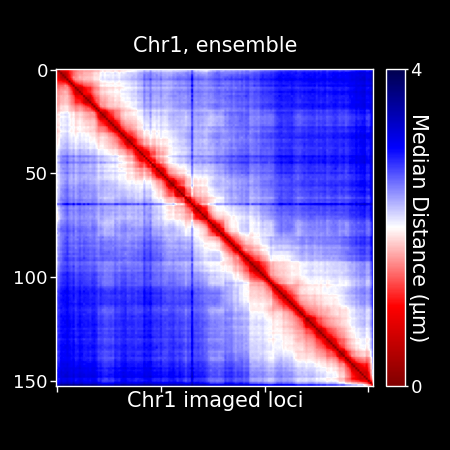

<IPython.core.display.Javascript object>


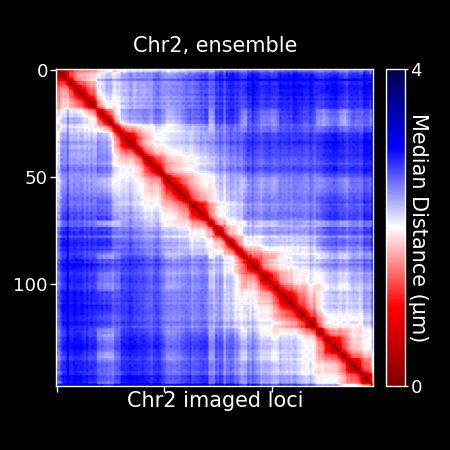

<IPython.core.display.Javascript object>


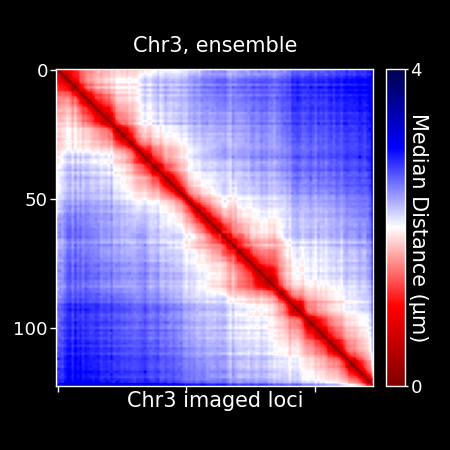

<IPython.core.display.Javascript object>


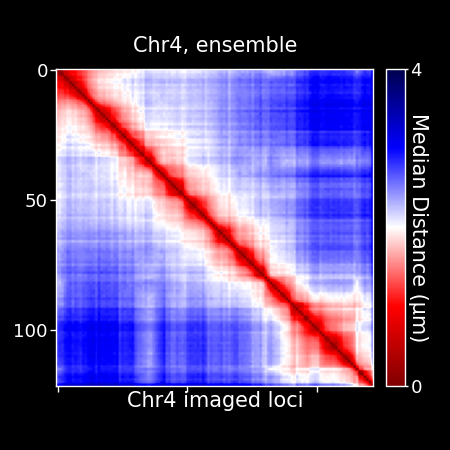

<IPython.core.display.Javascript object>


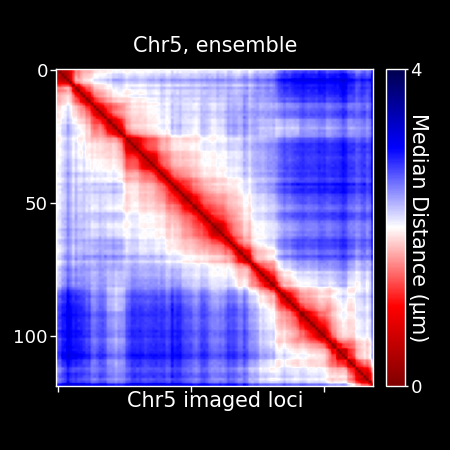

<IPython.core.display.Javascript object>


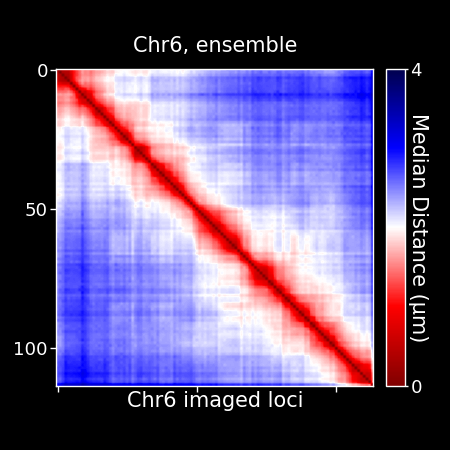

<IPython.core.display.Javascript object>


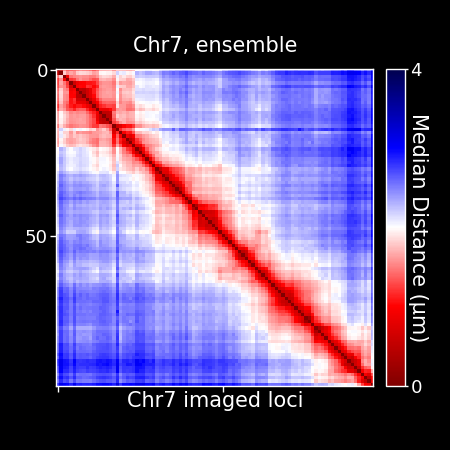

<IPython.core.display.Javascript object>


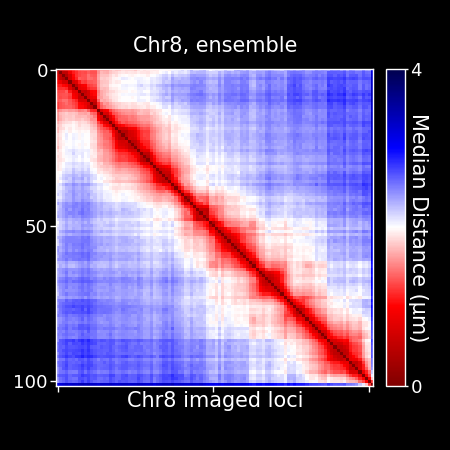

<IPython.core.display.Javascript object>


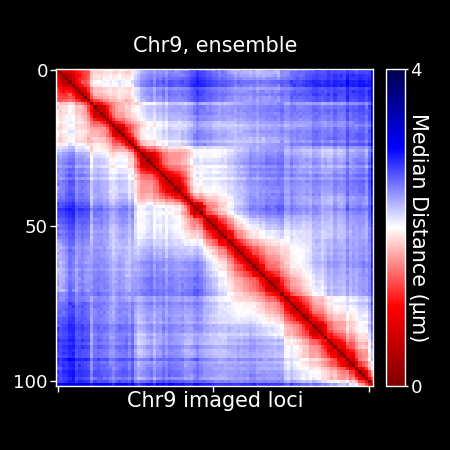

<IPython.core.display.Javascript object>


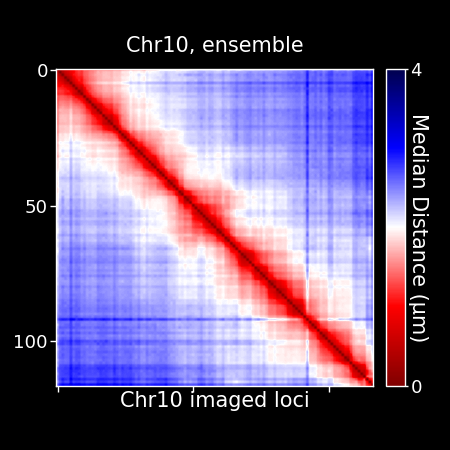

<IPython.core.display.Javascript object>


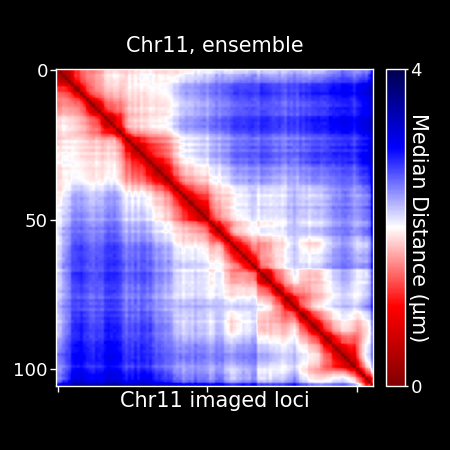

<IPython.core.display.Javascript object>


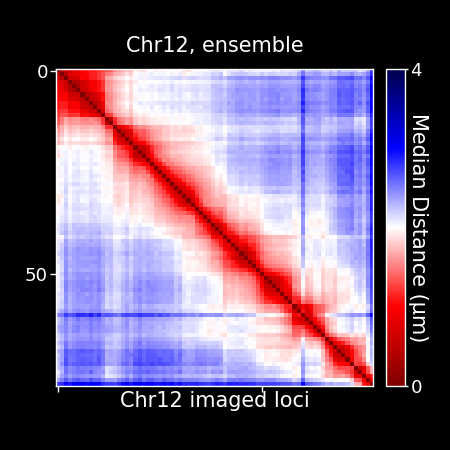

<IPython.core.display.Javascript object>


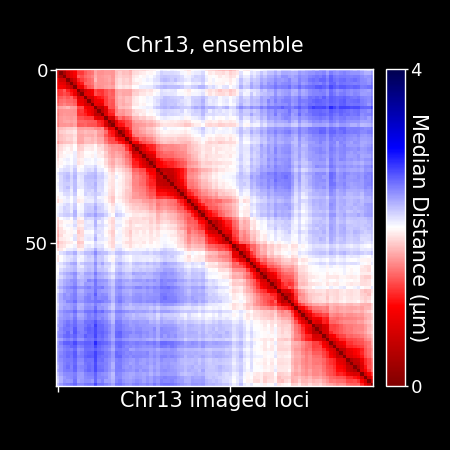

<IPython.core.display.Javascript object>


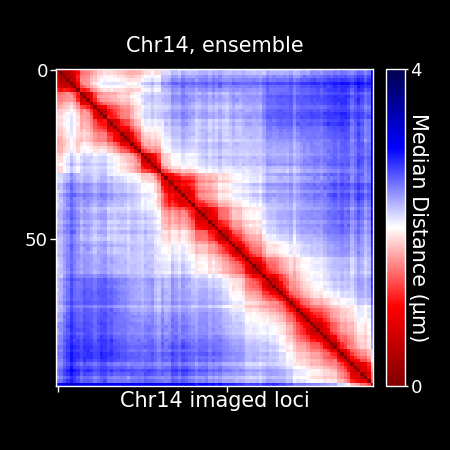

<IPython.core.display.Javascript object>


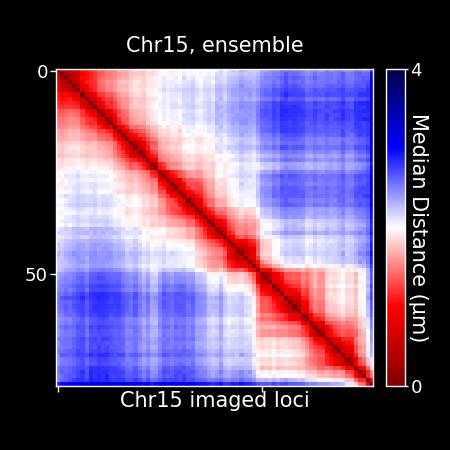

<IPython.core.display.Javascript object>


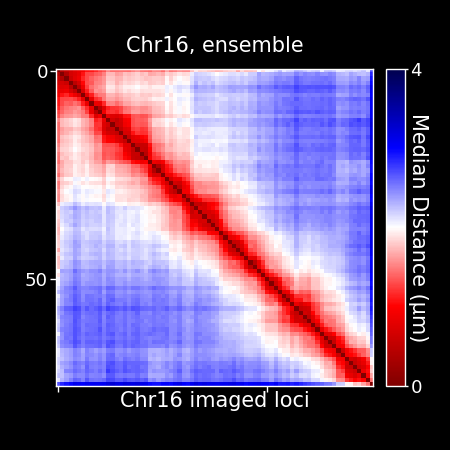

<IPython.core.display.Javascript object>


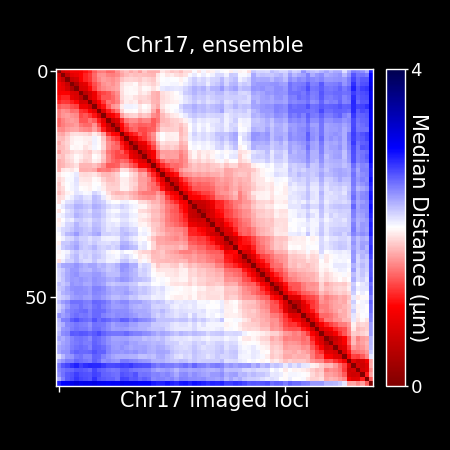

<IPython.core.display.Javascript object>


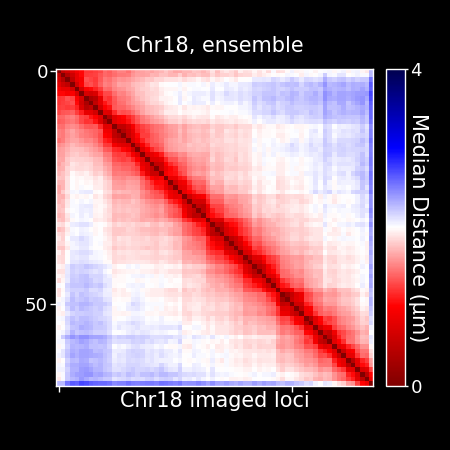

<IPython.core.display.Javascript object>


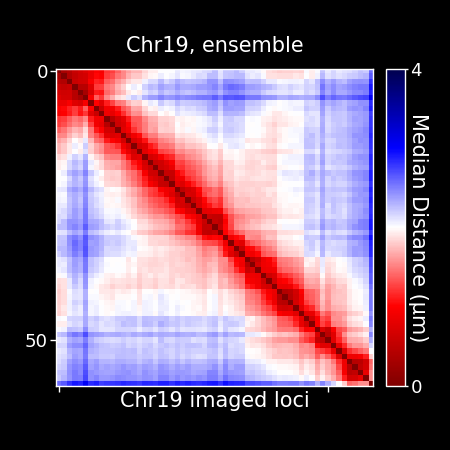

C:\Users\puzheng\AppData\Local\Temp/ipykernel_4812/1845084828.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)


<IPython.core.display.Javascript object>


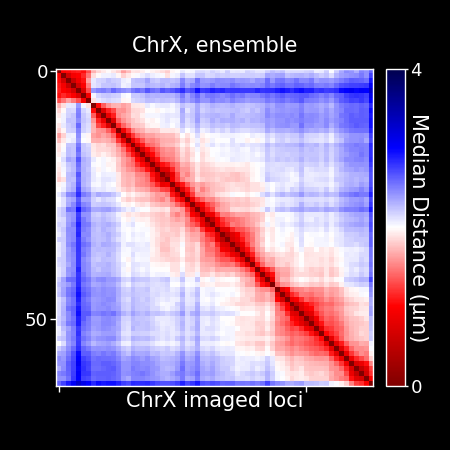

In [622]:
# select chromosome
for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue

    fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

    # create a color map
    median_cmap = cm.get_cmap('seismic_r').copy()
    median_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0,4

    _pf = ax1.imshow(ensemble_medianDict[f"cis_{sel_chr}"], 
                     cmap=median_cmap, vmin=vmin, vmax=vmax, )
    ax1.set_title(f"Chr{sel_chr}, ensemble", fontsize=_font_size)
    ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=2)
    ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
    ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])
    
    ax1.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Median Distance (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()
    plt.savefig(os.path.join(median_figure_folder, f"cis_ensemble_median_{sel_chr}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.savefig(os.path.join(median_figure_folder, f"cis_ensemble_median_{sel_chr}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()


# Subclass

In [12]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

In [13]:
subclass_2_medianDict_filename  = os.path.join(postanalysis_folder, 'subclass_2_medianDict.pkl')
subclass_2_medianDict = np.load(subclass_2_medianDict_filename, allow_pickle=True)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plot_chrs = ['5',] #'7', '11']
#sel_subclasses = ['Astro', 'Oligo', 'L2/3 IT']
sel_subclasses = [_subcls for _subcls in subclass_2_medianDict.keys() if _subcls not in ['other']]
for _subcls in sel_subclasses:
    _median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
        subclass_2_medianDict[_subcls], codebook, use_cis=True, use_trans=False, sort_by_region=False)
    
    
    fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

    # create a color map
    median_cmap = cm.get_cmap('seismic_r').copy()
    median_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0,6

    _pf = ax1.imshow(_median_mat, 
                     cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    ax1.set_title(f"{_subcls}, N={len(subclass_2_chr2ZxysList[_subcls])}", fontsize=_font_size)
    ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_xticklabels(_chr_names[:-1], rotation=90)

    ax1.hlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.vlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([0, len(_median_mat)])
    ax1.set_ylim([len(_median_mat), 0])

    ax1.tick_params('both', labelsize=_font_size-1.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Median Distance (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()

    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_median_subclass_{_subcls.replace(r'/','_').replace(' ', '_')}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()
    
    
    # sel_chr
    for sel_chr in plot_chrs:

        fig, ax1 = plt.subplots(figsize=(1.5,1.5), dpi=200)

        # create a color map
        median_cmap = cm.get_cmap('seismic_r').copy()
        median_cmap.set_bad(color=[0.5,0.5,0.5,1])

        vmin,vmax = 0,4

        _pf = ax1.imshow(subclass_2_medianDict[_subcls][f"cis_{sel_chr}"], 
                         cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

        ax1.set_title(f"Chr{sel_chr}, {_subcls}, N={len(subclass_2_chr2ZxysList[_subcls])}", fontsize=_font_size-1)
        ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size-1, labelpad=2)
        ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
        #ax1.set_yticklabels(_chr_names[:-1],)
        ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
        #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

        ax1.xaxis.set_tick_params(which='both', labelbottom=True)
        ax1.yaxis.set_tick_params(which='both', labelleft=True)
        ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
        ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

        ax1.tick_params('both', labelsize=_font_size-1.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

        # locate ax1
        divider = make_axes_locatable(ax1)
        # colorbar ax
        cax = divider.append_axes('right', size='6%', pad="4%")
        cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
        cbar.ax.tick_params('both', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=_ticklabel_size-1,
                        pad=1, labelleft=False) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

        cbar.set_ticks([vmin,vmax])
        cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
        cbar.outline.set_linewidth(_ticklabel_width)
        cbar.set_label('Median Distance (\u03BCm)', 
                       fontsize=_font_size-1, labelpad=2, rotation=270)
        cbar.ax.minorticks_off()
        plt.savefig(os.path.join(median_figure_folder, 
                                 f"cis_median_subclass_{_subcls.replace(r'/','_').replace(' ', '_')}_{sel_chr}.png"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)                    
        plt.savefig(os.path.join(median_figure_folder, 
                                 f"cis_median_subclass_{_subcls.replace(r'/','_').replace(' ', '_')}_{sel_chr}.pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
        plt.show()
    
    

In [630]:
plt.close('all')

## subclass trans

<IPython.core.display.Javascript object>


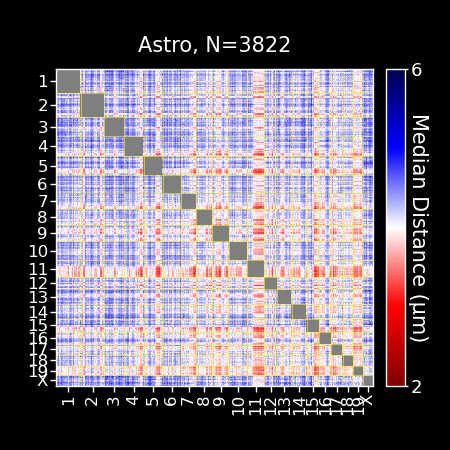

<IPython.core.display.Javascript object>


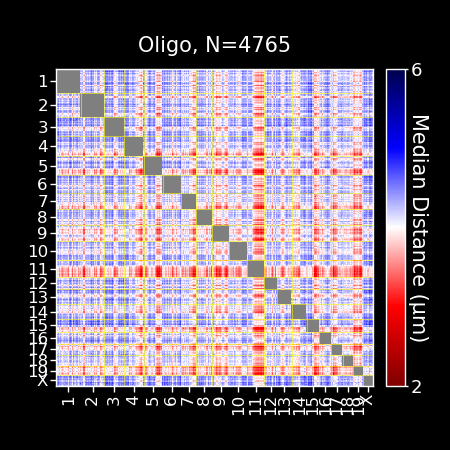

<IPython.core.display.Javascript object>


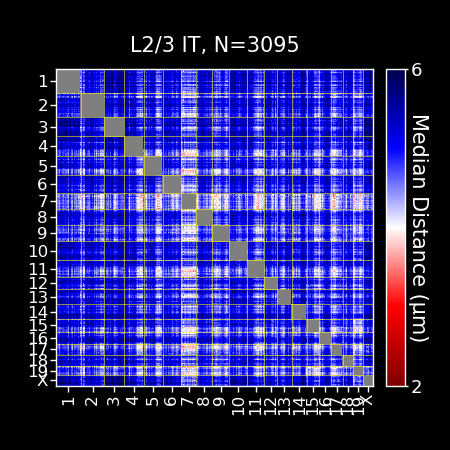

In [719]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sel_subclasses = ['Astro', 'Oligo', 'L2/3 IT']
subclass_2_transMedianMat = {}
#sel_subclasses = [_subcls for _subcls in subclass_2_medianDict.keys() if _subcls not in ['other']]
for _subcls in sel_subclasses:
    _median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
        subclass_2_medianDict[_subcls], codebook, use_cis=False, use_trans=False, sort_by_region=False)
    subclass_2_transMedianMat[_subcls] = _median_mat
    
    fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

    # create a color map
    median_cmap = cm.get_cmap('seismic_r').copy()
    median_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 2,6

    _pf = ax1.imshow(_median_mat, 
                     cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    ax1.set_title(f"{_subcls}, N={len(subclass_2_chr2ZxysList[_subcls])}", fontsize=_font_size)
    ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_xticklabels(_chr_names[:-1], rotation=90)

    ax1.hlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.vlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([0, len(_median_mat)])
    ax1.set_ylim([len(_median_mat), 0])

    ax1.tick_params('both', labelsize=_font_size-1.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Median Distance (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()

    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_median_subclass_{_subcls.replace(r'/','_').replace(' ', '_')}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_median_subclass_{_subcls.replace(r'/','_').replace(' ', '_')}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

In [720]:
_mat = subclass_2_transMedianMat['L2/3 IT']
_mat_vals = _mat[np.isfinite(_mat)]

In [725]:
_mat_astro = subclass_2_transMedianMat['Astro']
_mat_astro_vals = _mat_astro[np.isfinite(_mat_astro)]

<IPython.core.display.Javascript object>


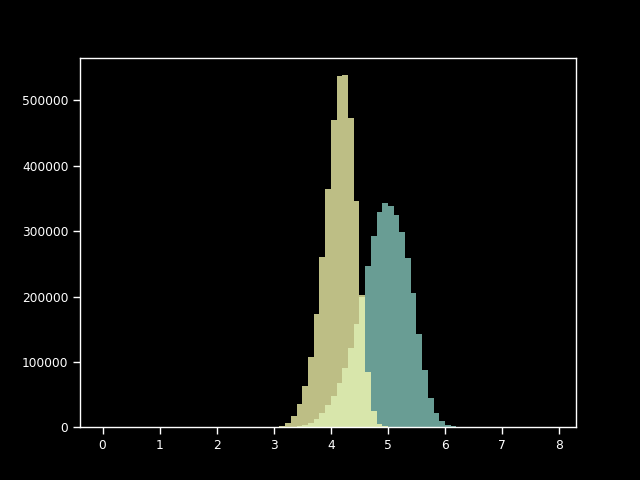

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 4.00000e+00, 1.60000e+01, 3.60000e+01, 1.10000e+02,
        5.00000e+02, 2.13000e+03, 7.09800e+03, 1.73340e+04, 3.50620e+04,
        6.34880e+04, 1.07816e+05, 1.72488e+05, 2.60072e+05, 3.65012e+05,
        4.69740e+05, 5.36842e+05, 5.38720e+05, 4.73318e+05, 3.46502e+05,
        2.01738e+05, 8.50620e+04, 2.46620e+04, 5.25200e+03, 1.12200e+03,
        2.86000e+02, 9.40000e+01, 4.80000e+01, 1.00000e+01, 1.00000e+01,
        8.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

In [730]:

plt.figure()
plt.hist(_mat_vals, bins=np.arange(0,8,0.1), alpha=0.75)
plt.hist(_mat_astro_vals, bins=np.arange(0,8,0.1), alpha=0.75)

# Compare with Hi-C

In [632]:
hic_result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig1_HiC_matrices\analyses'
hic_data_files = [os.path.join(hic_result_folder, _fl) for _fl in os.listdir(hic_result_folder) if '.npy' in _fl]
hic_compressed_files = [_fl for _fl in hic_data_files if '_compressed' in _fl]
#hic_raw_files = [_fl for _fl in hic_data_files if '_raw' in _fl]

In [633]:
chr_2_hic_mat = {}
for _fl in hic_compressed_files:
    _mat = np.load(_fl)
    _chr = os.path.basename(_fl).split('.npy')[0].split('_chr')[1]
    chr_2_hic_mat[_chr] = _mat

In [634]:
from ImageAnalysis3.figure_tools import _double_col_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   
from ImageAnalysis3.structure_tools.distance import sort_chr
from sklearn.linear_model import LinearRegression

num_cols = 7

num_rows = int(np.ceil(len(chr_2_hic_mat)/num_cols))



<IPython.core.display.Javascript object>


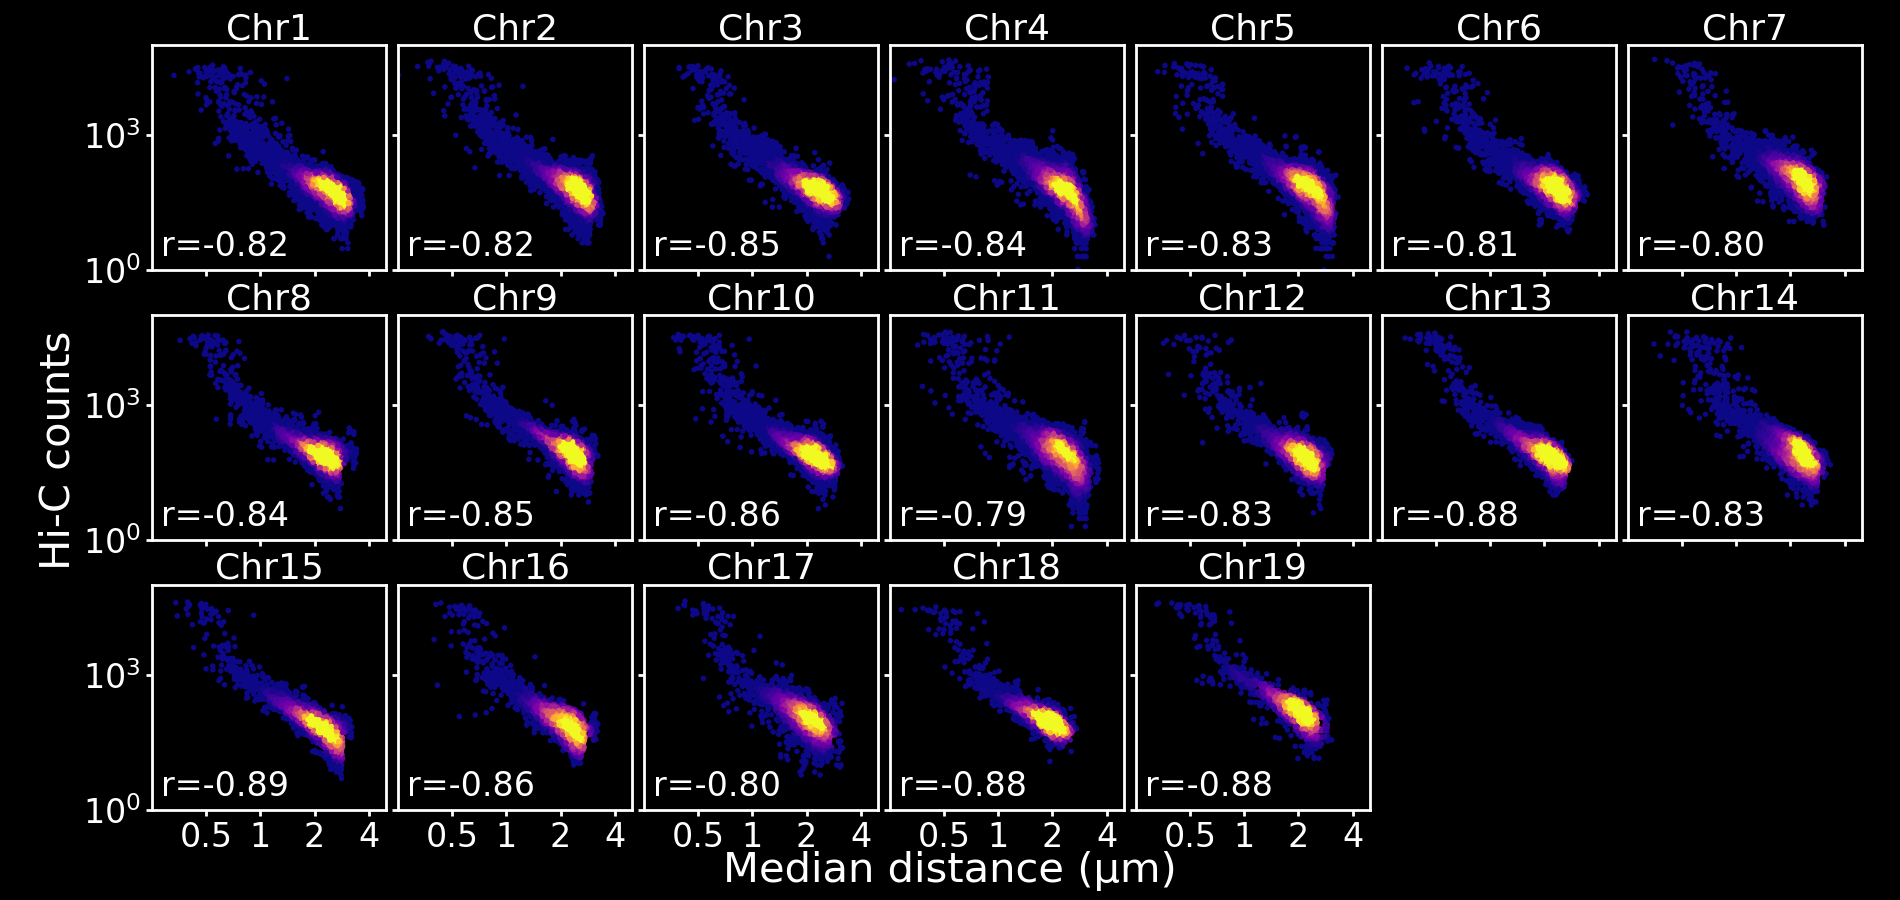

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

In [636]:


fig, axes_list = plt.subplots(num_rows, num_cols,figsize=(_double_col_width,_single_col_width), 
                              sharex=True, sharey=True, dpi=200)
#chr_2_hic_mat['1']

_ax_list = np.ravel(axes_list)

for _i, _chr in enumerate(sorted(chr_2_hic_mat, key=lambda _v:sort_chr(_v))):
    # extract axis
    _ax = _ax_list[_i]
    # extract mat
    _hic_mat = chr_2_hic_mat[_chr]
    _median_mat = ensemble_medianDict[f'cis_{_chr}']
    # unravel
    _hic_entries = _hic_mat[np.triu_indices(len(_hic_mat),1)]
    _median_entries = _median_mat[np.triu_indices(len(_hic_mat),1)]
    _valid_inds = (_hic_entries > 0) & (_median_entries > 0) 
    _hic_entries = _hic_entries[_valid_inds]
    _median_entries = _median_entries[_valid_inds]
    # calculate color
    values = np.vstack([np.log(_median_entries), np.log(_hic_entries)])
    kernel = scipy.stats.gaussian_kde(values)(values)
    vmin,vmax = scipy.stats.scoreatpercentile(kernel,10),scipy.stats.scoreatpercentile(kernel,90)
    
    # plot
    _sct = sns.scatterplot(_median_entries, _hic_entries, 
                           c=kernel, cmap='plasma', vmin=0.1, vmax=1.,
                           linewidth=0, s=1,
                           ax=_ax)
    _ax.set_xscale('log')
    _ax.set_yscale('log')
    _ax.set_xticks([0.5,1,2,4])
    _ax.set_xticklabels([0.5,1,2,4])
    _ax.set_xlim([0.25, 5])
    _ax.set_ylim([1, 1e5])
    _ax.minorticks_off()
    # legend for coefficient
    _x = np.log(_median_entries)[:,np.newaxis]
    _y = np.log(_hic_entries)
    _reg = LinearRegression().fit(_x,_y)
    _r = -1 * np.sqrt(_reg.score(_x,_y))

    _ax.text(x=0.28, y=2, s=f'r={_r:.2f}', fontsize=_font_size-1.5)
    # title and labels
    _ax.set_title(f"Chr{_chr}", fontsize=_font_size-1, pad=1)
    # formatting
    _ax.tick_params('both', labelsize=_font_size-1.5, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    labelleft=False,labelbottom=False, pad=1,) 
    [i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]
    
# delete empty axes
for _null_ax in _ax_list[len(chr_2_hic_mat):]:
    fig.delaxes(_null_ax)
# 
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.08, right=0.98, top=0.95, bottom=0.1)
# label the left most one
for _axes in axes_list:
    _axes[0].tick_params('y', labelleft=True,pad=1,) 
    
# label the bottom most row
for _ax in axes_list[-1]:
    _ax.tick_params('x', labelbottom=True,pad=1,) 

fig.supxlabel('Median distance (\u03BCm)', fontsize=_font_size, )
fig.supylabel('Hi-C counts', fontsize=_font_size, )
plt.savefig(os.path.join(median_figure_folder, f"scatter_median_to_hic.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"scatter_median_to_hic.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

# scatter

In [15]:
sel_chr = '7'

In [16]:
sel_subcls_1 = 'L2/3 IT'
sel_subcls_2 = 'Astro' # 

In [17]:
mat_1 = subclass_2_medianDict[sel_subcls_1][f"cis_{sel_chr}"]
mat_2 = subclass_2_medianDict[sel_subcls_2][f"cis_{sel_chr}"]

In [18]:
from sklearn.linear_model import LinearRegression
#run regression
X = mat_1[np.triu_indices_from(mat_1,1)][:,np.newaxis]
y = mat_2[np.triu_indices_from(mat_2,1)]
#sel_inds = np.where()
reg = LinearRegression(fit_intercept=False).fit(X, y)
#Returns the coefficient of determination R^2 of the prediction.
reg.score(X, y)
#0.9725287282456724

0.8768941400202378

<IPython.core.display.Javascript object>


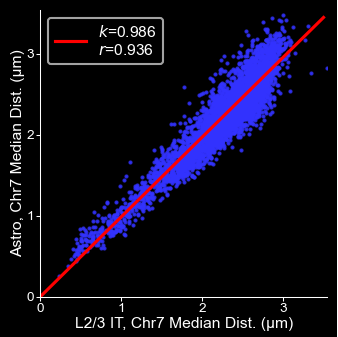

In [19]:
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=150)
ax.scatter(X[:,0], y, s=1, color=[0.2,0.2,1],#color=[0,0,0.5], 
           alpha=0.8)
line_x = np.arange(0, np.max(X), 0.1)
ax.plot(line_x[:,np.newaxis], reg.predict(line_x[:,np.newaxis]), 
        color='r', label=f'$k$={reg.coef_[0]:.3f}\n$r$={np.sqrt(reg.score(X, y)):.3f}')
ax.legend(fontsize=_font_size)

vmax = max(np.max(X), np.max(y))
ax.set_xlim([0, vmax])
ax.set_ylim([0, vmax])
ax.set_xticks(np.arange(0, vmax, 1))
ax.set_yticks(np.arange(0, vmax, 1))

ax.set_xlabel(f"{sel_subcls_1}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"{sel_subcls_2}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
ax.spines["top"].set_visible(False) # remove top frame
ax.spines["right"].set_visible(False) #remove right frame

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.12, right=0.97, top=0.97, bottom=0.12)
plt.savefig(os.path.join(median_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_subcls_1.replace('/','-').replace(' ','_')}-{sel_subcls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_subcls_1.replace('/','-').replace(' ','_')}-{sel_subcls_2.replace('/','-').replace(' ','_')}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [20]:
y_pred = reg.predict(X)
residual_mat = reg.predict(np.reshape(mat_1, -1)[:,np.newaxis]).reshape(mat_1.shape) - mat_2

<IPython.core.display.Javascript object>


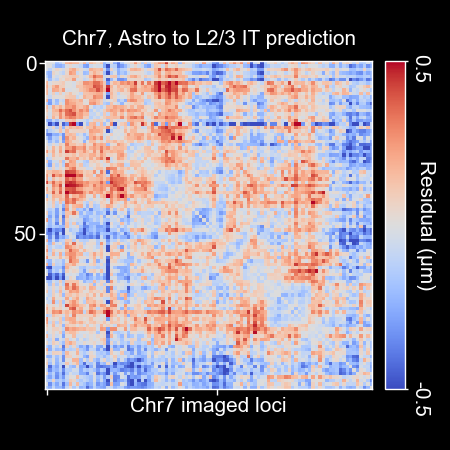

In [21]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
#residual_cmap = cm.get_cmap('RdYlBu').copy()
residual_cmap = cm.get_cmap('coolwarm').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = -0.5, 0.5

_pf = ax1.imshow(residual_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, {sel_subcls_2} to {sel_subcls_1} prediction", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(median_figure_folder, 
                         f"residual_heatmap_chr{sel_chr}_{sel_subcls_1.replace('/','-').replace(' ','_')}-{sel_subcls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

## given chromosome, calculate pairwise correlation between subclasses

In [31]:
from sklearn.linear_model import LinearRegression


import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

_celltype_order = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L6 CT','L6b','L5 ET','L5/6 NP',
     'Sst','Pvalb','Vip','Lamp5','Sncg',
     'Astro','Oligo','OPC','Endo','Micro','Peri','SMC','VLMC',
    ]
sel_celltypes = [_c for _c in _celltype_order if len(subclass_2_chr2ZxysList[_c]) > num_th]


In [32]:
num_th = 500

chr_2_correlationDf = {}
chr_2_slopeDf = {}
for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue
    correlation_dicts = {'cell type':[_subcls for _subcls in _celltype_order if len(subclass_2_chr2ZxysList[_subcls]) >= num_th]}
    slope_dicts = {'cell type':[_subcls for _subcls in _celltype_order if len(subclass_2_chr2ZxysList[_subcls]) >= num_th]}
    for _subcls_1 in _celltype_order:
        if len(subclass_2_chr2ZxysList[_subcls_1]) < num_th:
            continue
        _mat_1 = subclass_2_medianDict[_subcls_1][f'cis_{sel_chr}']
        _reg_rs = []
        _reg_ks = []
        for _subcls_2 in _celltype_order:
            _mat_2 = subclass_2_medianDict[_subcls_2][f'cis_{sel_chr}']
            if len(subclass_2_chr2ZxysList[_subcls_2]) < num_th:
                continue
            #run regression
            X = _mat_1[np.triu_indices_from(_mat_1,1)]
            y = _mat_2[np.triu_indices_from(_mat_2,1)]
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            #print(np.sum(valid_inds), _subcls_1)
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            #sel_inds = np.where()
            reg = LinearRegression(fit_intercept=False).fit(X, y)
            #Returns the coefficient of determination R^2 of the prediction.
            _r = np.sqrt(reg.score(X, y))
            _reg_rs.append(_r)
            _reg_ks.append(reg.coef_[0])
            
        correlation_dicts[_subcls_1] = _reg_rs
        slope_dicts[_subcls_1] = _reg_ks
    # append as DF
    correlation_df = pd.DataFrame(correlation_dicts).set_index('cell type')  
    chr_2_correlationDf[sel_chr] = correlation_df
    slope_df = pd.DataFrame(slope_dicts).set_index('cell type')  
    chr_2_slopeDf[sel_chr] = slope_df

In [51]:
np.isinf(y).sum()

0

<IPython.core.display.Javascript object>


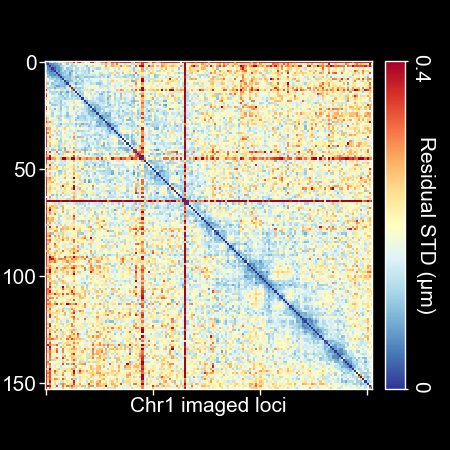

<IPython.core.display.Javascript object>


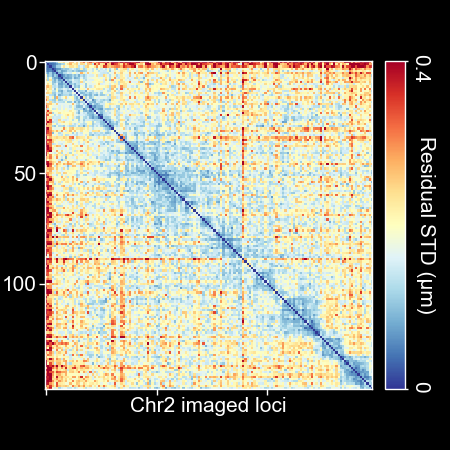

<IPython.core.display.Javascript object>


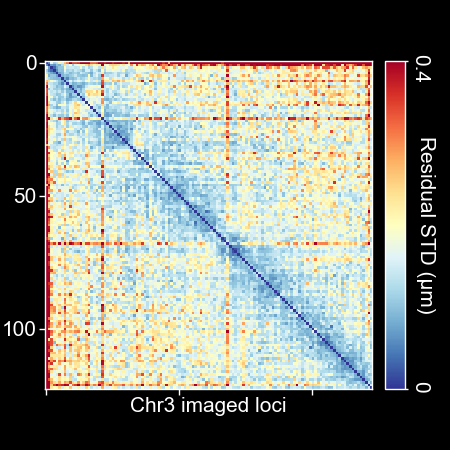

<IPython.core.display.Javascript object>


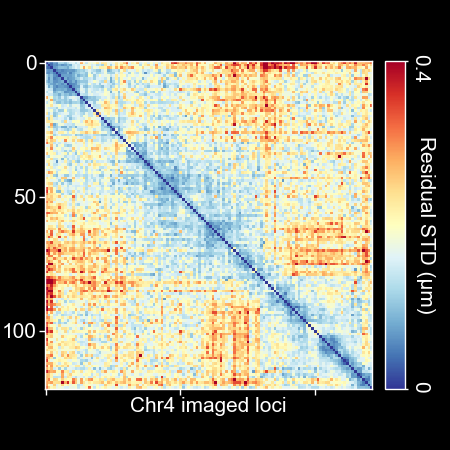

<IPython.core.display.Javascript object>


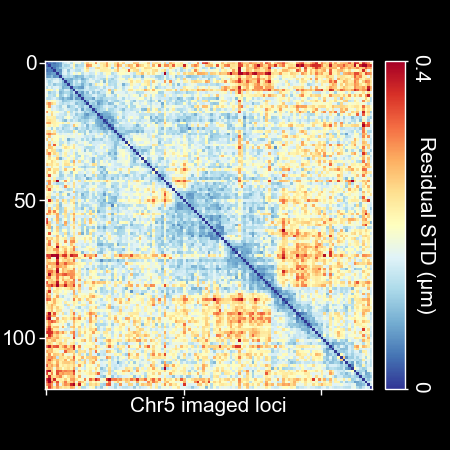

<IPython.core.display.Javascript object>


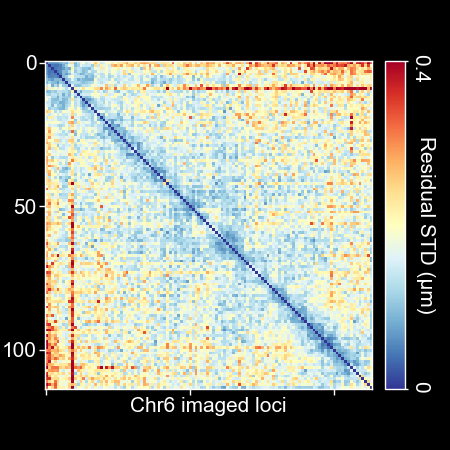

<IPython.core.display.Javascript object>


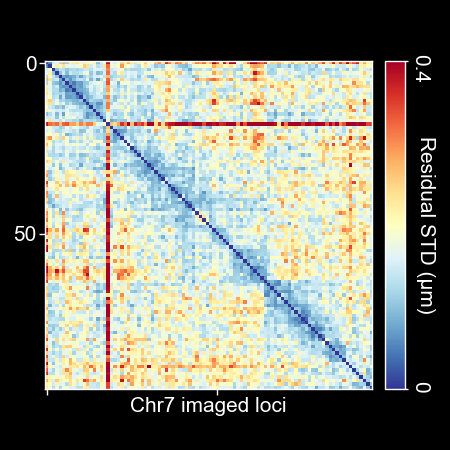

<IPython.core.display.Javascript object>


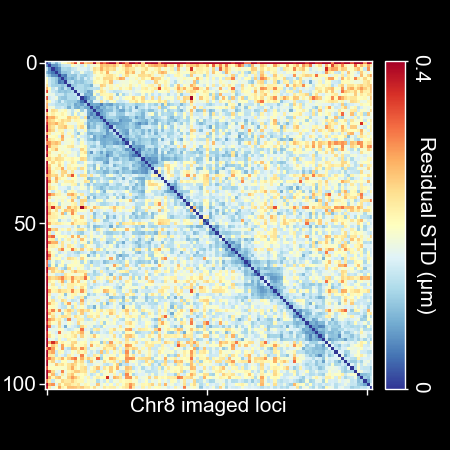

<IPython.core.display.Javascript object>


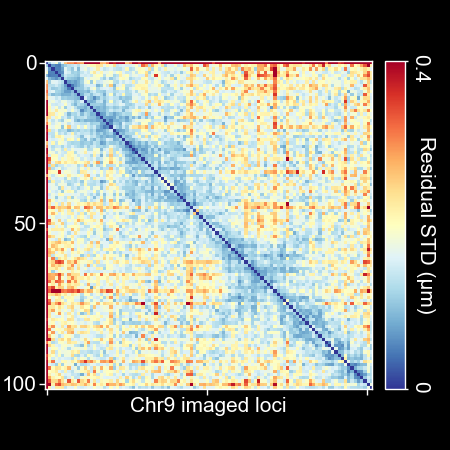

<IPython.core.display.Javascript object>


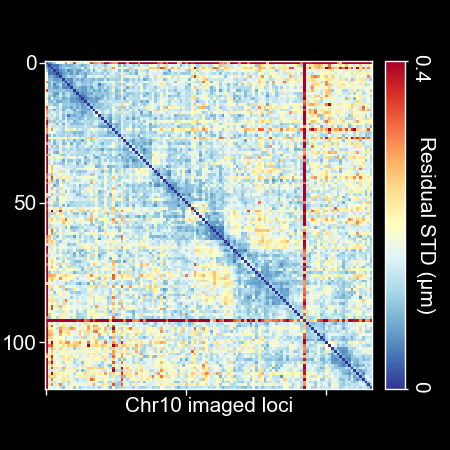

<IPython.core.display.Javascript object>


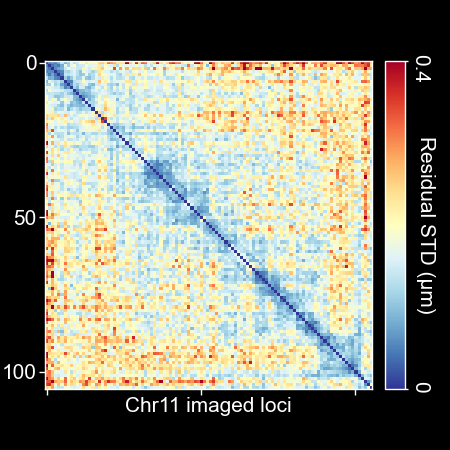

<IPython.core.display.Javascript object>


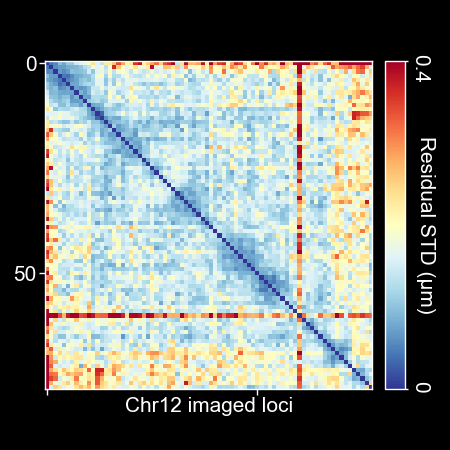

<IPython.core.display.Javascript object>


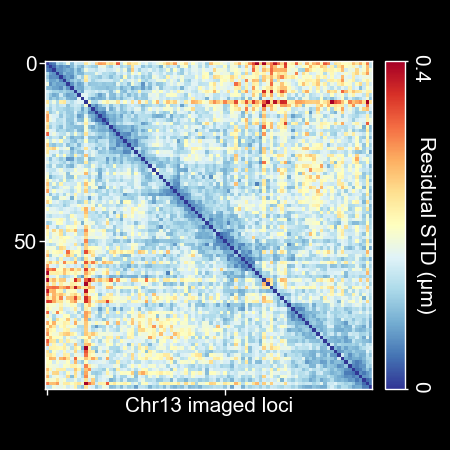

<IPython.core.display.Javascript object>


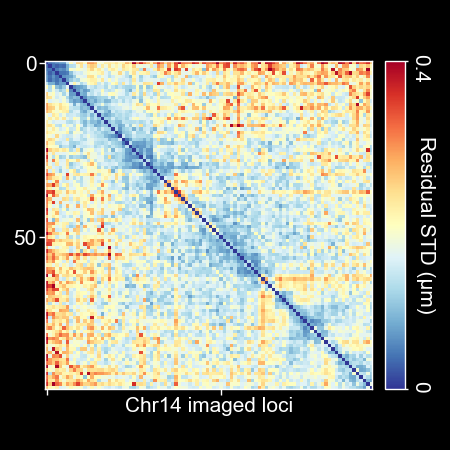

<IPython.core.display.Javascript object>


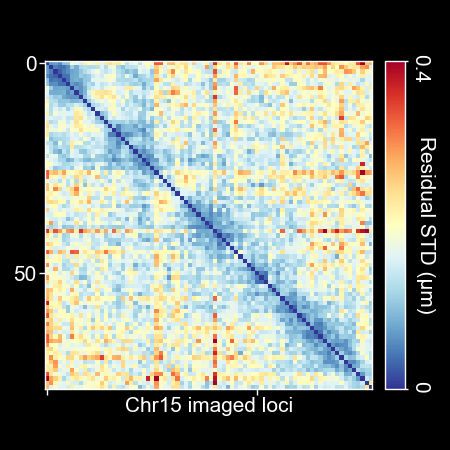

<IPython.core.display.Javascript object>


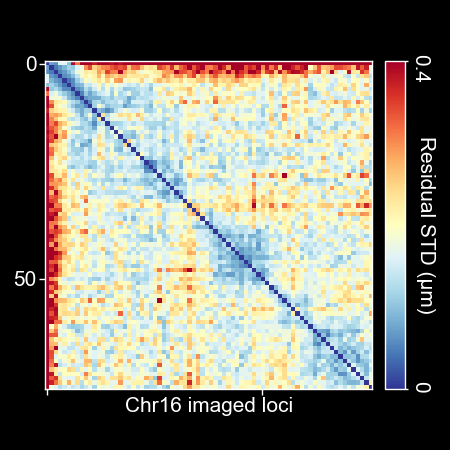

<IPython.core.display.Javascript object>


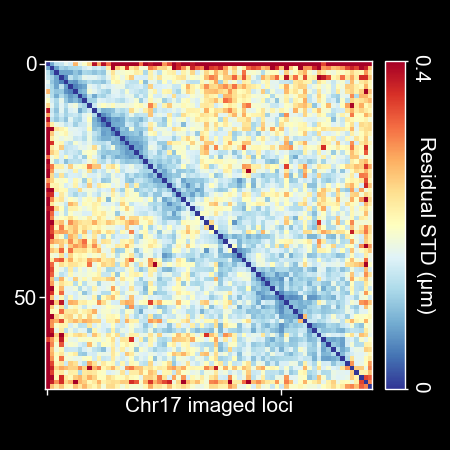

<IPython.core.display.Javascript object>


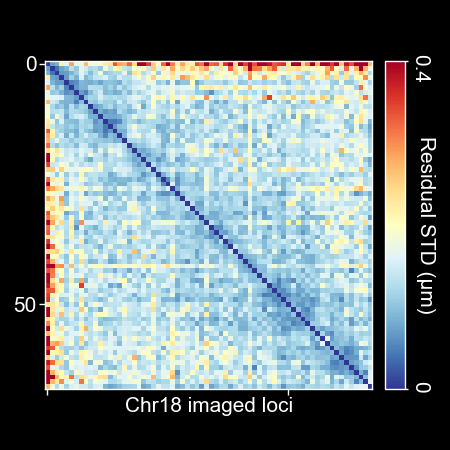

<IPython.core.display.Javascript object>


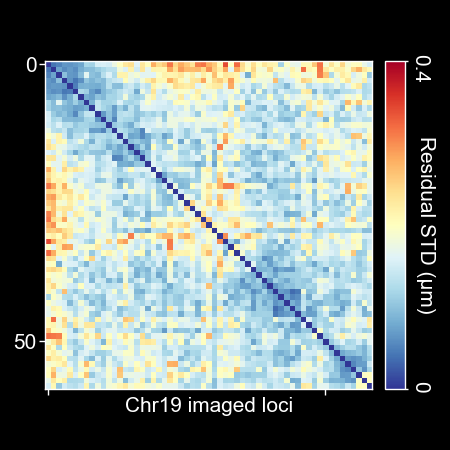

<IPython.core.display.Javascript object>


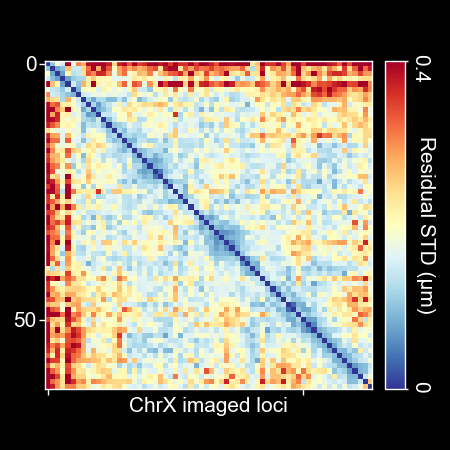

In [59]:
#sel_chr = '5'#'7'
num_th = 500

for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue
        
    residual_mats = []
    correlation_dicts = {'cell type':[_subcls for _subcls in _celltype_order if len(subclass_2_chr2ZxysList[_subcls]) >= num_th]}
    for _subcls_1 in _celltype_order:
        if len(subclass_2_chr2ZxysList[_subcls_1]) < num_th:
            continue
        _mat_1 = subclass_2_medianDict[_subcls_1][f'cis_{sel_chr}']
        _reg_rs = []
        for _subcls_2 in _celltype_order:
            _mat_2 = subclass_2_medianDict[_subcls_2][f'cis_{sel_chr}']
            if len(subclass_2_chr2ZxysList[_subcls_2]) < num_th:
                continue
            #run regression
            X = _mat_1[np.triu_indices_from(_mat_1,1)]
            y = _mat_2[np.triu_indices_from(_mat_2,1)]
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            #print(np.sum(valid_inds), _subcls_1)
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            #sel_inds = np.where()
            reg = LinearRegression(fit_intercept=False).fit(X, y)
            #Returns the coefficient of determination R^2 of the prediction.
            _r = np.sqrt(reg.score(X, y))
            _reg_rs.append(_r)
            # residual
            #y_pred = reg.predict(X)
            _valid_mat1 = _mat_1[np.isfinite(_mat_1)]
            _pred_valid_mat1 = reg.predict(_valid_mat1[:,np.newaxis])
            _pred_mat1 = np.ones_like(_mat_1) * np.nan
            _pred_mat1[np.isfinite(_mat_1)] = _pred_valid_mat1
            # residual
            _rmat = _pred_mat1 - _mat_2
            # append
            residual_mats.append(_rmat)
        correlation_dicts[_subcls_1] = _reg_rs
    correlation_df = pd.DataFrame(correlation_dicts).set_index('cell type')    

    residual_mats = np.array(residual_mats)
    residual_mats = residual_mats.reshape(len(sel_celltypes),len(sel_celltypes), 
                                          residual_mats.shape[-2],residual_mats.shape[-1],  )

    # calculate variational mat
    subclass_variation_mat = np.nanstd(residual_mats[np.triu_indices(len(sel_celltypes),1)], axis=0)

    fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

    # create a color map
    residual_cmap = cm.get_cmap('RdYlBu_r').copy()
    residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0, 0.4

    _pf = ax1.imshow(subclass_variation_mat, 
                     cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    #ax1.set_title(f"Chr{sel_chr}, standard deviation of residuals", fontsize=_font_size)
    ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
    ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
    ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

    ax1.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Residual STD (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()
    fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(os.path.join(median_figure_folder, f"variation_residual_heatmap_chr{sel_chr}.pdf"),
                transparent=True, bbox_inches='tight', dpi=300)
    plt.savefig(os.path.join(median_figure_folder, f"variation_residual_heatmap_chr{sel_chr}.png"),
                transparent=True, bbox_inches='tight', dpi=300)
    plt.show()

In [60]:
median_figure_folder

'\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MouseBrain_PostAnalysis\\Figures_0903_dark\\Median_distmap'

In [678]:
# within neurons
neuronal_subclasses = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L6 CT','L6b','L5 ET','L5/6 NP',
     'Sst','Pvalb','Vip','Lamp5','Sncg', ]
sel_celltypes = [_c for _c in _celltype_order if len(subclass_2_chr2ZxysList[_c]) > num_th]
neuron_inds = np.array([_i for _i, _c in enumerate(sel_celltypes) if _c in neuronal_subclasses])
nonNeuron_inds = np.array([_i for _i, _c in enumerate(sel_celltypes) if _c not in neuronal_subclasses])

ITneuron_inds = np.array([_i for _i, _c in enumerate(sel_celltypes) if 'IT' in _c])

In [732]:
neuron_residual_mats = residual_mats[neuron_inds[:,np.newaxis], neuron_inds]
#neuron_variation_mat = np.std(neuron_residual_mats, axis=(0,1))
neuron_variation_mat = np.std(neuron_residual_mats[np.triu_indices(len(neuron_inds),1)], axis=0)

<IPython.core.display.Javascript object>


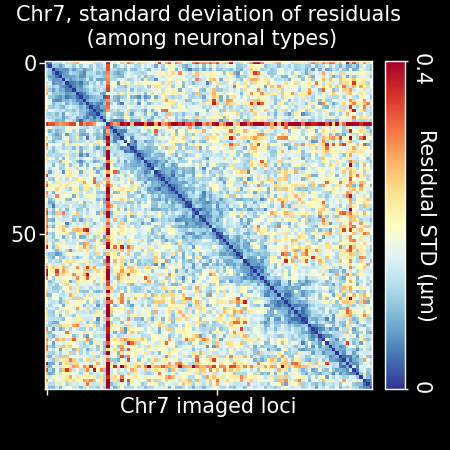

In [733]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
residual_cmap = cm.get_cmap('RdYlBu_r').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = 0, 0.4

_pf = ax1.imshow(neuron_variation_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, standard deviation of residuals\n (among neuronal types)", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual STD (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(median_figure_folder, 
                         f"variation_neuronal_residual_heatmap_chr{sel_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, 
                         f"variation_neuronal_residual_heatmap_chr{sel_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [734]:
#ITneuron_residual_mats = residual_mats.reshape((len(sel_celltypes), len(sel_celltypes), len(mat_1), len(mat_1)))
ITneuron_residual_mats = residual_mats[ITneuron_inds[:,np.newaxis], ITneuron_inds]
#ITneuron_variation_mat = np.std(ITneuron_residual_mats, axis=(0,1))

ITneuron_variation_mat = np.std(ITneuron_residual_mats[np.triu_indices(len(ITneuron_inds),1)], axis=0)

<IPython.core.display.Javascript object>


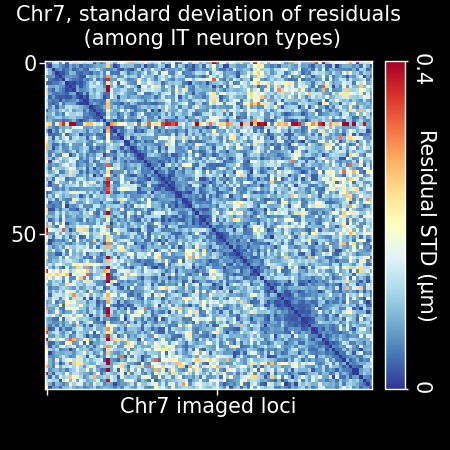

In [735]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
residual_cmap = cm.get_cmap('RdYlBu_r').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = 0, 0.4

_pf = ax1.imshow(ITneuron_variation_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, standard deviation of residuals\n (among IT neuron types)", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual STD (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(median_figure_folder, f"variation_IT_neuron_residual_heatmap_chr{sel_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"variation_IT_neuron_residual_heatmap_chr{sel_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [736]:
#nonNeuron_residual_mats = residual_mats.reshape((len(sel_celltypes), len(sel_celltypes), len(mat_1), len(mat_1)))
nonNeuron_residual_mats = residual_mats[nonNeuron_inds[:,np.newaxis], nonNeuron_inds]
#nonNeuron_variation_mat = np.std(nonNeuron_residual_mats, axis=(0,1))
nonNeuron_variation_mat = np.std(nonNeuron_residual_mats[np.triu_indices(len(nonNeuron_inds),1)], axis=0)

<IPython.core.display.Javascript object>


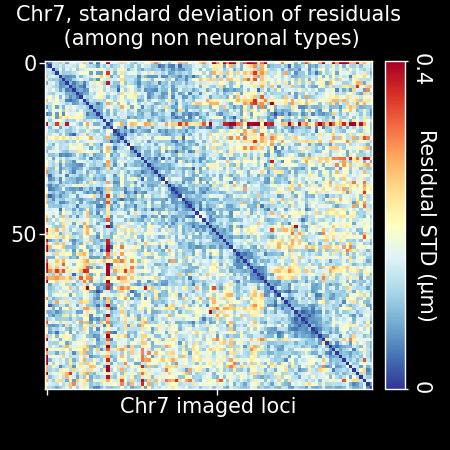

In [737]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
residual_cmap = cm.get_cmap('RdYlBu_r').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = 0, 0.4

_pf = ax1.imshow(nonNeuron_variation_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, standard deviation of residuals\n (among non neuronal types)", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual STD (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(median_figure_folder, f"variation_non_neuronal_residual_heatmap_chr{sel_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"variation_non_neuronal_residual_heatmap_chr{sel_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


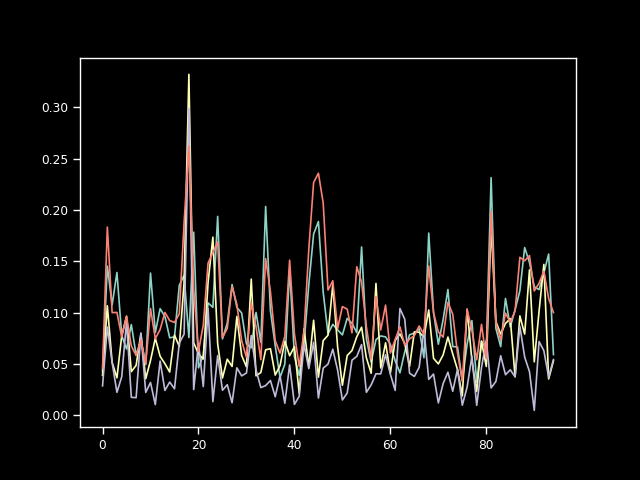

In [716]:
plt.figure()
plt.plot(np.diag(nonNeuron_variation_mat, 1))
plt.plot(np.diag(neuron_variation_mat, 1))
plt.plot(np.diag(ITneuron_variation_mat, 1))
plt.plot(np.diag(variation_mat, 1))

<IPython.core.display.Javascript object>


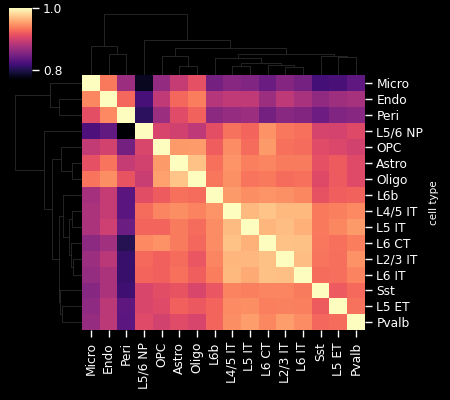

In [738]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(correlation_df.values, method='weighted')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
sns.clustermap(chr_2_correlationDf['7'], col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma')

In [583]:
chr_2_slopeDf['7']

L2/3 IT   L4/5 IT     L5 IT     L6 IT     L6 CT       L6b  \
cell type                                                               
L2/3 IT    1.000000  1.027392  0.937133  1.041781  1.027486  0.981773   
L4/5 IT    0.970058  1.000000  0.910579  1.012151  0.998425  0.954220   
L5 IT      1.063569  1.094512  1.000000  1.109329  1.094171  1.045873   
L6 IT      0.956961  0.984695  0.897871  1.000000  0.984752  0.940738   
L6 CT      0.970412  0.998697  0.910543  1.012485  1.000000  0.954212   
L6b        1.012863  1.042620  0.950723  1.056550  1.042328  1.000000   
L5 ET      1.126074  1.159143  1.057387  1.174849  1.158658  1.107850   
L5/6 NP    1.007977  1.037207  0.945760  1.051502  1.037844  0.991226   
Sst        1.057607  1.088349  0.992595  1.103196  1.088230  1.039937   
Pvalb      1.095064  1.126570  1.027911  1.142086  1.126197  1.076609   
Astro      0.985921  1.015255  0.925556  1.028682  1.014723  0.970424   
Oligo      0.907389  0.934670  0.851931  0.946854  0.933986  0.893551   
OPC        0.995745  1.025439  0.934529  1.038837  1.025639  0.979849   
Endo       0.906440  0.932887  0.850917  0.945280  0.932002  0.892243   
Micro      0.857850  0.882901  0.805168  0.894760  0.882218  0.844279   
Peri       0.935097  0.962744  0.878304  0.975437  0.961541  0.920677   

              L5 ET   L5/6 NP       Sst     Pvalb     Astro     Oligo  \
cell type                                                               
L2/3 IT    0.882207  0.985363  0.939615  0.908619  1.007571  1.093557   
L4/5 IT    0.857438  0.957355  0.912967  0.882596  0.979649  1.063574   
L5 IT      0.940161  1.049279  1.000834  0.967970  1.073497  1.165243   
L6 IT      0.845481  0.944221  0.900318  0.870481  0.965679  1.048212   
L6 CT      0.857313  0.958204  0.913116  0.882544  0.979403  1.063085   
L6b        0.895415  0.999673  0.953174  0.921594  1.023139  1.110980   
L5 ET      1.000000  1.111399  1.060373  1.025329  1.137420  1.234865   
L5/6 NP    0.890693  1.000000  0.948570  0.916944  1.017223  1.104082   
Sst        0.935055  1.043734  1.000000  0.962715  1.067712  1.158878   
Pvalb      0.968110  1.080305  1.030815  1.000000  1.104594  1.199233   
Astro      0.871949  0.973035  0.928209  0.896832  1.000000  1.084235   
Oligo      0.802742  0.895569  0.854310  0.825654  0.919410  1.000000   
OPC        0.880221  0.983200  0.937512  0.905624  1.007630  1.094300   
Endo       0.801731  0.893672  0.853469  0.825219  0.917914  0.997292   
Micro      0.758338  0.845883  0.807466  0.780776  0.868459  0.943839   
Peri       0.827452  0.921979  0.880611  0.851754  0.947961  1.030319   

                OPC      Endo     Micro      Peri  
cell type                                          
L2/3 IT    0.997065  1.091774  1.151992  1.051859  
L4/5 IT    0.969499  1.060925  1.119468  1.022524  
L5 IT      1.062021  1.163177  1.227126  1.121271  
L6 IT      0.955524  1.045857  1.103729  1.007902  
L6 CT      0.969952  1.060208  1.118907  1.021525  
L6b        1.012219  1.108707  1.169670  1.068434  
L5 ET      1.125029  1.232591  1.299862  1.188064  
L5/6 NP    1.007099  1.101099  1.161990  1.060905  
Sst        1.056640  1.157061  1.220497  1.114962  
Pvalb      1.092903  1.197901  1.263637  1.154710  
Astro      0.987287  1.081838  1.141179  1.043417  
Oligo      0.909210  0.996710  1.051691  0.961668  
OPC        1.000000  1.091115  1.151618  1.051765  
Endo       0.907094  1.000000  1.052970  0.963016  
Micro      0.858709  0.944435  1.000000  0.910317  
Peri       0.936254  1.031161  1.086750  1.000000

<IPython.core.display.Javascript object>


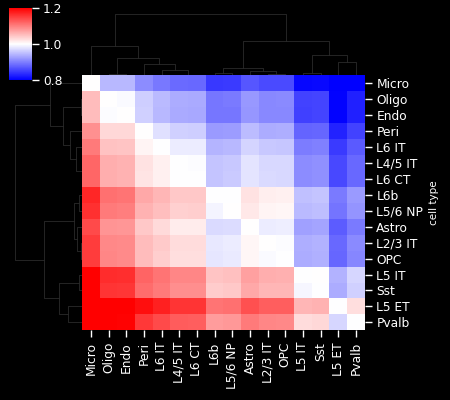

In [739]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(chr_2_slopeDf['7'].values, method='weighted')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
cluster_fig = sns.clustermap(chr_2_slopeDf['7'], col_linkage=_corr_lkg, row_linkage=_corr_lkg, figsize=(4.5,4),
               cmap='bwr', vmin=0.8, vmax=1.2)

In [740]:
average_correlation_df = pd.DataFrame(np.nanmean([_v for _v in chr_2_correlationDf.values()], axis=0),
                                      columns=correlation_df.columns)

average_correlation_df.index = correlation_df.index

<IPython.core.display.Javascript object>


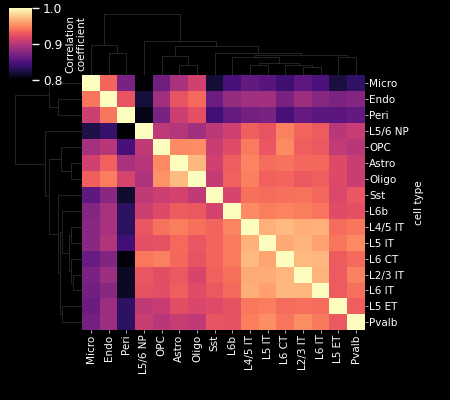

C:\Users\puzheng\AppData\Local\Temp/ipykernel_4812/3439986716.py:17: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax])


In [741]:
from scipy.cluster.hierarchy import linkage,dendrogram
plot_chr = '7'
_corr_lkg = linkage(chr_2_correlationDf[plot_chr].values, method='average')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.8,1
ax = sns.clustermap(chr_2_correlationDf[plot_chr], 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma', vmin=vmin, vmax=vmax)
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Correlation\ncoefficient', labelpad=2, fontsize=_font_size)
plt.savefig(os.path.join(median_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [355]:
average_correlation_df

L2/3 IT   L4/5 IT     L5 IT     L6 IT     L6 CT       L6b  \
cell type                                                               
L2/3 IT    1.000000  0.969951  0.964235  0.965697  0.971895  0.933017   
L4/5 IT    0.969348  1.000000  0.962268  0.964402  0.973107  0.932534   
L5 IT      0.965345  0.964148  1.000000  0.960768  0.966546  0.934260   
L6 IT      0.966118  0.965484  0.960017  1.000000  0.971461  0.932363   
L6 CT      0.970950  0.972755  0.964386  0.970228  1.000000  0.937350   
L6b        0.938750  0.939649  0.938027  0.937454  0.944513  1.000000   
L5 ET      0.940310  0.938313  0.939224  0.935577  0.941485  0.917961   
L5/6 NP    0.924954  0.927531  0.920094  0.925082  0.934285  0.896391   
Sst        0.932512  0.933709  0.931034  0.930148  0.936691  0.907289   
Pvalb      0.946358  0.945200  0.945193  0.942204  0.947109  0.920438   
Astro      0.935116  0.943502  0.929802  0.934211  0.947315  0.917901   
Oligo      0.929966  0.936896  0.926002  0.930225  0.939491  0.923121   
OPC        0.937620  0.942412  0.933900  0.935021  0.945974  0.919026   
Endo       0.891130  0.900067  0.884818  0.888565  0.900939  0.880775   
Micro      0.878010  0.888367  0.869542  0.875832  0.890918  0.863092   
Peri       0.871910  0.879800  0.867603  0.869350  0.877852  0.865448   

              L5 ET   L5/6 NP       Sst     Pvalb     Astro     Oligo  \
cell type                                                               
L2/3 IT    0.931175  0.919244  0.927430  0.939399  0.934717  0.920189   
L4/5 IT    0.927520  0.920505  0.927320  0.937040  0.941975  0.926947   
L5 IT      0.932188  0.916582  0.928114  0.939986  0.932472  0.918782   
L6 IT      0.926743  0.920372  0.925789  0.935554  0.935024  0.921642   
L6 CT      0.930531  0.927060  0.929732  0.938361  0.945843  0.929365   
L6b        0.913911  0.898803  0.909090  0.918120  0.925981  0.921139   
L5 ET      1.000000  0.899681  0.912956  0.924924  0.924160  0.919920   
L5/6 NP    0.892148  1.000000  0.896245  0.905174  0.902962  0.888563   
Sst        0.906741  0.896552  1.000000  0.919874  0.913491  0.902849   
Pvalb      0.923381  0.909849  0.923661  1.000000  0.918787  0.910229   
Astro      0.911380  0.896358  0.906637  0.907572  1.000000  0.962332   
Oligo      0.918000  0.895329  0.907749  0.910336  0.966810  1.000000   
OPC        0.916703  0.900912  0.911759  0.918206  0.959892  0.957637   
Endo       0.877181  0.853523  0.871539  0.867452  0.942136  0.951374   
Micro      0.854514  0.835821  0.852791  0.846380  0.926016  0.933536   
Peri       0.866290  0.836417  0.853643  0.853568  0.920157  0.938379   

                OPC      Endo     Micro      Peri  
cell type                                          
L2/3 IT    0.929368  0.893458  0.888105  0.843245  
L4/5 IT    0.933623  0.900057  0.895284  0.850181  
L5 IT      0.928194  0.891011  0.884106  0.844215  
L6 IT      0.928163  0.892040  0.887219  0.842247  
L6 CT      0.937538  0.900602  0.897288  0.846841  
L6b        0.918183  0.893505  0.884961  0.851137  
L5 ET      0.920133  0.895370  0.883322  0.859388  
L5/6 NP    0.896512  0.864830  0.858235  0.812293  
Sst        0.908484  0.882434  0.873748  0.833624  
Pvalb      0.919190  0.885422  0.875085  0.842853  
Astro      0.955455  0.942431  0.930814  0.902290  
Oligo      0.958455  0.957194  0.945073  0.933500  
OPC        1.000000  0.932550  0.921887  0.900054  
Endo       0.924579  1.000000  0.940906  0.924987  
Micro      0.907087  0.937046  1.000000  0.887546  
Peri       0.909215  0.938667  0.914476  1.000000

<IPython.core.display.Javascript object>


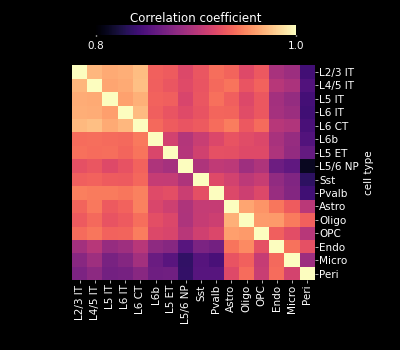

In [742]:
ax = sns.clustermap(average_correlation_df, 
                    cmap='magma', 
                    col_cluster=False, row_cluster=False, method='average', metric='seuclidean', 
                    figsize=(4,3.5), xticklabels=True, yticklabels=True,
                    vmin=0.8, vmax=1,
                    cbar_kws=dict(ticks=[0.8,1], orientation='horizontal'),
                    )
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_title('Correlation coefficient', pad=2, fontsize=_font_size+1)
plt.savefig(os.path.join(median_figure_folder, f"Averaged_correlation_median_heatmap.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"Averaged_correlation_median_heatmap.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()